### 1. 

En el archivo "logistic_regression_df_class" hemos visto un ejemplo multiclase. Realiza un análisis con regresión linear multinominal teniendo como target la columna "duración". Es decir, averigua cuánto aumentan o disminuyen la duración cuando se aumenta una unidad los valores de las demás columnas.

- ¿Qué acierto tiene? (score)
## Muy bajo
- ¿Cuál es el RMSE? ¿Dirías que es un valor alto?
## Muy alto.
- Viendo la matriz de correlación, ¿tienen coherencia los resultados de la regresión?
## No.
- ¿Es la regresión un buen método para este dataset?
## No lo es. Aquí convendría más un algoritmo de clasificación.

In [22]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("../data/usuarios_win_mac_lin.csv")

In [3]:
df

,duracion,paginas,acciones,valor,clase
0,7.0,2,4,8,2
1,21.0,2,6,6,2
2,57.0,2,4,4,2
3,101.0,3,6,12,2
4,109.0,2,6,12,2
...,...,...,...,...,...
165,13.0,1,7,42,0
166,12.0,1,2,6,0
167,13.0,1,3,9,0
168,13.0,1,7,28,0


<AxesSubplot:>

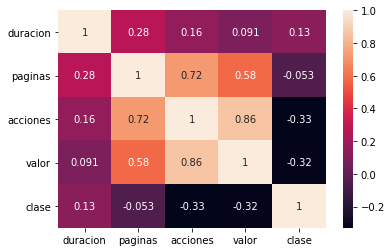

In [4]:
sns.heatmap(df.corr(), annot=True)

In [5]:
X = np.array(df[df.columns.difference(['duracion'])])
y = np.array(df['duracion'])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=343)

In [11]:
lgr = LinearRegression()

In [17]:
lgr.fit(X_train, y_train)
sc_train = lgr.score(X_train, y_train)*100
sc_test = lgr.score(X_test,y_test)*100

In [18]:
sc_train

10.431293288905675

In [19]:
sc_test

2.8386393178867375

In [21]:
predictions = lgr.predict(X_test)
predictions

array([ 86.52341804, 182.29524521, 148.6938022 , 104.60318656,
       104.34622598,  52.97109687, 123.3862707 ,  70.12126677,
        86.52341804,  98.3236523 , 108.20321754,  27.34810958,
        71.09545178,  63.64780259,  74.11369303, 215.68145412,
       104.60318656,  78.03371527,  28.20076871,  52.41072798,
        76.40080103,  90.60966917, 115.18606742, 110.49032554,
        27.15417967, 215.68145412, 110.61185142,  35.44995253,
        98.98238152, 148.6938022 , 134.01076139, 145.55403507,
       145.55403507, 104.34622598])

In [25]:
print('RMSE:', np.sqrt(mean_squared_error(y_test, predictions)))

RMSE: 219.66580034995698
